In [1]:
from rich.console import Console
from rich.progress import track
import collections
import itertools
from lexical_benchmark import settings
import re

root_dir = settings.PATH.raw_childes
def all_files():
    return itertools.chain(
        (root_dir / "Eng-NA/child").glob("*.txt"),
        (root_dir / "Eng-NA/adult").glob("*.raw"),
        (root_dir / "Eng-UK/child").glob("*.raw"),
        (root_dir / "Eng-UK/adult").glob("*.raw")
    )


In [18]:
match_pattern = re.compile(r"(\w+)@(\w+)")
patterns = []

for file in track(all_files(), description="Extracting all tags..."):
    for line in file.read_text().splitlines():
        matched = match_pattern.findall(line)
        for _, tag in matched:
            patterns.append(tag)

print("@ tags extracted")
all_tags = collections.Counter(patterns)
print(all_tags)
len(all_tags)

Output()

@ tags extracted
Counter({'o': 45394, 'l': 40297, 'p': 23193, 'c': 20063, 'q': 5634, 'f': 5407, 'd': 4768, 'wp': 4704, 'b': 3230, 's': 3049, 'si': 2449, 'n': 2088, 'i': 839, 'u': 714, 't': 508, 'z': 328, 'k': 232, 'x': 64, 'g': 1, 'm': 1})


20

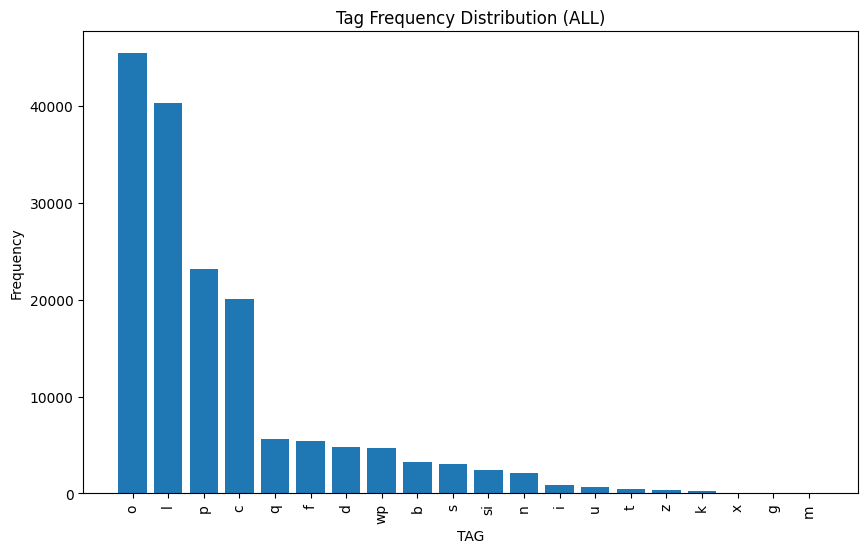

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

sorted_words = sorted(wc.items(), key=lambda x: x[1], reverse=True)
tags, frequencies = zip(*sorted_words, strict=True)
plt.figure(figsize=(10, 6))
plt.bar(tags, frequencies)
plt.xlabel("TAG")
plt.ylabel("Frequency")
plt.title("Tag Frequency Distribution (ALL)")
plt.xticks(rotation=90)
plt.savefig('img/tag_frequency.svg', bbox_inches='tight', pad_inches=1, format='svg')

### Search tags

In [22]:
match_pattern = re.compile(r"\s\&\{\w+\s")
tags = []

for file in track(all_files(), description="Extracting pattern..."):
    for line in file.read_text().splitlines():
        matched = match_pattern.findall(line)
        tags.extend([(file.name, tag) for tag in matched])

print("Items extracted")
len(tags)

Output()

Items extracted


0

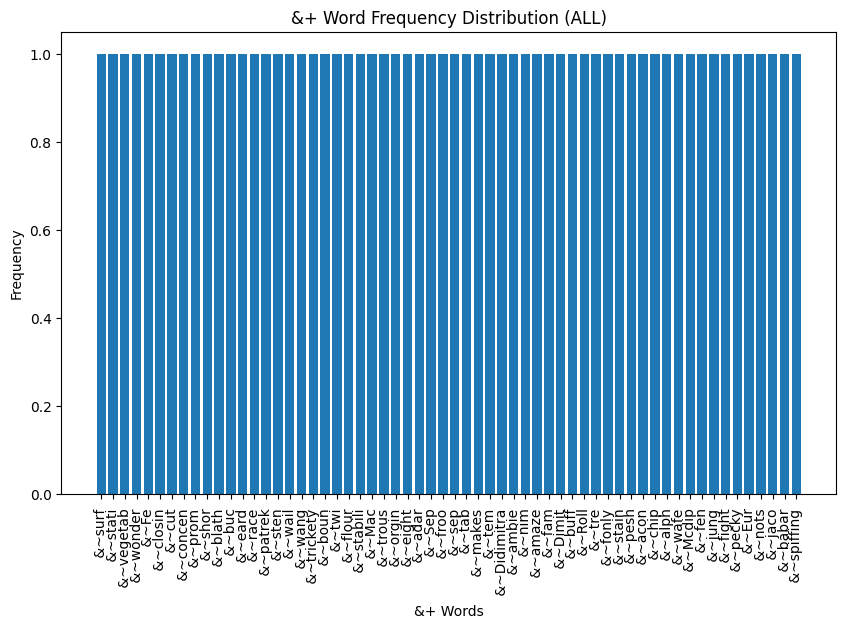

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import collections

wc = collections.Counter([w.replace('&+', '') for _, w in tags])
sorted_items = sorted(wc.items(), key=lambda x: x[1], reverse=True)
sorted_items = sorted_items[-60:]
_items, _frequencies = zip(*sorted_items, strict=True)
plt.figure(figsize=(10, 6))
plt.bar(_items, _frequencies)
plt.xlabel("&+ Words")
plt.ylabel("Frequency")
plt.title("&+ Word Frequency Distribution (ALL)")
plt.xticks(rotation=90)
plt.savefig('img/ommited_frequency.svg', bbox_inches='tight', pad_inches=1, format='svg')

### Search Word Stress 

In [39]:
match_pattern = re.compile(r'\b(\w+(:\w+)+)\b')
things = []

for file in track(all_files(), description="Extracting pattern..."):
    for line in file.read_text().splitlines():
        matched = match_pattern.findall(line)
        things.extend([(file.name, tag[0]) for tag in matched])

print("Items extracted")
len(things)

Output()

Items extracted


39955

In [45]:
match_pattern = re.compile(r'\s:\s')
things = []

for file in track(all_files(), description="Extracting pattern..."):
    for line in file.read_text().splitlines():
        matched = match_pattern.findall(line)
        things.extend([(file.name, tag) for tag in matched])

print("Items extracted")
len(things)

Output()

Items extracted


13

In [50]:
match_pattern = re.compile(r'(%pic:|%txt:)')
things = []

for file in track(all_files(), description="Extracting pattern..."):
    for line in file.read_text().splitlines():
        matched = match_pattern.findall(line)
        things.extend([(file.name, tag) for tag in matched])

print("Items extracted")
len(things)

Output()

Items extracted


0

In [46]:
things

[('Gleason_Mother_william.raw', ' : '),
 ('Sprott_12SleepyHeads.raw', ' : '),
 ('Sprott_12SleepyHeads.raw', ' : '),
 ('Sprott_05AmyConv.raw', ' : '),
 ('Sprott_05AmyConv.raw', ' : '),
 ('Sprott_05AmyConv.raw', ' : '),
 ('Sprott_05AmyConv.raw', ' : '),
 ('Sprott_05AmyConv.raw', ' : '),
 ('Sprott_02MarblePlay.raw', ' : '),
 ('Sprott_02MarblePlay.raw', ' : '),
 ('Hall_BlackWork_pag.raw', ' : '),
 ('Hall_BlackWork_pag.raw', ' : '),
 ('Hall_BlackWork_pag.raw', ' : ')]

In [37]:
import random
test_cases = [
  " baˈna:nas ",
  " ye:s ",
  " fuˈdge ",
  " ca:t ",
  " dˈog ",
  " hˈeˈllˈo ",
  " w:o:w ",
  " fˈuˈ:t:bˈaˈll ",
  " c:a:t:s ",
  " dˈoˈgˈs ",
  " baˈna:nas ye:s fuˈdge ",
  " ca:t dˈog hˈeˈllˈo ",
  " w:o:w fˈuˈ:t:bˈaˈll c:a:t:s ",
  " dˈoˈgˈs baˈna:nas ye:s ",
  " ˈ ",
  " : ",
  " ˈˈˈˈˈ ",
  " ::::: ",
  " wordˈword ",
  " word:word ",
  " banana ",
    " yes ",
    " cat ",
    " dog ",
    " hello ",
    " wow ",
    " football ",
    " cats ",
    " dogs ",
    " banana yes fudge ",
    " cat dog hello ",
    " wow football cats ",
    " dogs banana yes ",
    " ",
    "",
    " word ",
    " word word ",
    " 123 ",
    " abc "
]

# match_pattern = re.compile(r'\b(\w+[ˈ:]+\w+)\b')
match_pattern = re.compile(r'\b(\w+(:\w+)+)\b')
random.shuffle(test_cases)
for s in test_cases:
    matches = match_pattern.findall(s)
    print(f'Matches for ({s}): {[t[0] for t in matches]}')

Matches for ( football ): []
Matches for ( word:word ): ['word:word']
Matches for ( ˈˈˈˈˈ ): []
Matches for ( wow ): []
Matches for ( ): []
Matches for ( hˈeˈllˈo ): []
Matches for ( w:o:w fˈuˈ:t:bˈaˈll c:a:t:s ): ['w:o:w', 'fˈuˈ:t:bˈaˈll', 'c:a:t:s']
Matches for (): []
Matches for ( dogs ): []
Matches for ( banana yes fudge ): []
Matches for ( cat ): []
Matches for ( : ): []
Matches for ( fuˈdge ): []
Matches for ( wordˈword ): []
Matches for ( dog ): []
Matches for ( w:o:w ): ['w:o:w']
Matches for ( dˈog ): []
Matches for ( dˈoˈgˈs baˈna:nas ye:s ): ['baˈna:nas', 'ye:s']
Matches for ( c:a:t:s ): ['c:a:t:s']
Matches for ( ˈ ): []
Matches for ( hello ): []
Matches for ( fˈuˈ:t:bˈaˈll ): ['fˈuˈ:t:bˈaˈll']
Matches for ( dˈoˈgˈs ): []
Matches for ( wow football cats ): []
Matches for ( yes ): []
Matches for ( ca:t ): ['ca:t']
Matches for ( ::::: ): []
Matches for ( word ): []
Matches for ( ye:s ): ['ye:s']
Matches for ( dogs banana yes ): []
Matches for ( baˈna:nas ): ['baˈna:nas']
Matche

In [53]:
test_cases = [
    "Those are some cool kittens %pic: image.png", "Those are some cool kittens %pic: image.jpg , i love kittens",
    "Those are some cool kittens %txt: content.txt", "Those are some cool kittens %pic: image.jpg , i love kittens"
]
match_pattern = re.compile(r'%pic:| %txt:')
random.shuffle(test_cases)
for s in test_cases:
    matches = match_pattern.findall(s)
    print(f'Matches for ({s}): {matches}')

Matches for (Those are some cool kittens %txt: content.txt): [' %txt:']
Matches for (Those are some cool kittens %pic: image.jpg , i love kittens): ['%pic:']
Matches for (Those are some cool kittens %pic: image.jpg , i love kittens): ['%pic:']
Matches for (Those are some cool kittens %pic: image.png): ['%pic:']
